## CIFAR10 Dataset 신경망으로 훈련

#### imports

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

#### 데이터 적재

In [12]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [13]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(train_images[0].shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(32, 32, 3)


In [14]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [15]:
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

#### 데이터 시각화

In [16]:
train_labels = np.int32(train_labels.flatten())

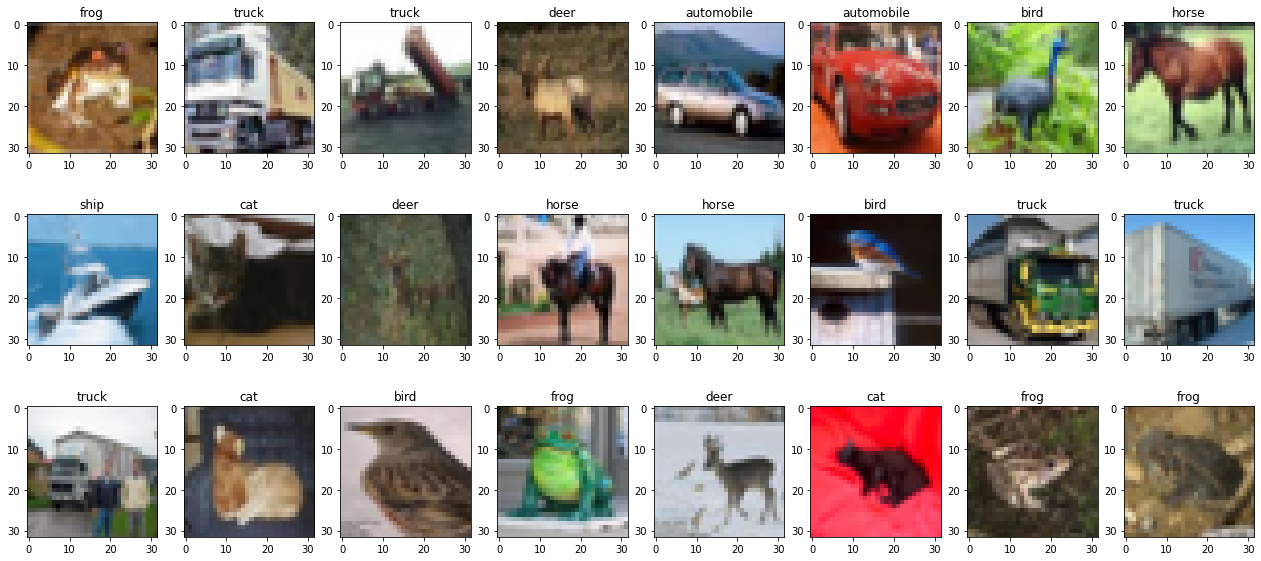

In [17]:
figure, axes = plt.subplots(figsize=(22, 10), nrows=3, ncols=8)

for i in range(3):
    for j in range(8):
        axes[i][j].imshow(train_images[(i*8)+j])
        axes[i][j].set_title(class_names[train_labels[(i*8)+j]])


#### 데이터 전처리

In [18]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

In [24]:
test_oh_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

#### 모델 생성

In [38]:
tf.keras.backend.clear_session()

input_tensor = Input(shape=(32, 32, 3))
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation="relu")(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
                 
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", activation="relu")(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)                 
                 
x = Flatten()(x)
x = Dropout(rate=0.5)(x)                 
x = Dense(200, activation="relu")(x)
x = Dropout(rate=0.3)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(rate=0.2)(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

#### 모델 컴파일

In [39]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#### 모델 학습

In [40]:

history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 11s 32ms/step - loss: 1.9087 - accuracy: 0.2770 - val_loss: 1.4983 - val_accuracy: 0.4432
Epoch 2/30
313/313 [==============================] - 9s 30ms/step - loss: 1.4160 - accuracy: 0.4798 - val_loss: 1.2022 - val_accuracy: 0.5632
Epoch 3/30
313/313 [==============================] - 9s 30ms/step - loss: 1.2014 - accuracy: 0.5719 - val_loss: 1.0549 - val_accuracy: 0.6254
Epoch 4/30
313/313 [==============================] - 9s 30ms/step - loss: 1.0577 - accuracy: 0.6290 - val_loss: 0.9573 - val_accuracy: 0.6629
Epoch 5/30
313/313 [==============================] - 10s 31ms/step - loss: 0.9568 - accuracy: 0.6651 - val_loss: 0.8541 - val_accuracy: 0.6987
Epoch 6/30
313/313 [==============================] - 9s 30ms/step - loss: 0.8784 - accuracy: 0.6950 - val_loss: 0.8072 - val_accuracy: 0.7194
Epoch 7/30
313/313 [==============================] - 9s 30ms/step - loss: 0.8141 - accuracy: 0.7188 - val_loss: 0.7802 - val_accuracy: 0.73

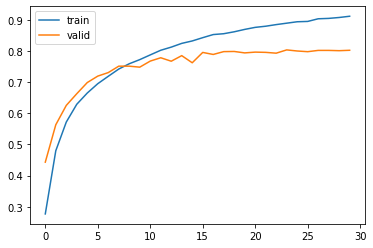

In [41]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="valid")
plt.legend()

#### 테스트 데이터에서 검증

In [42]:
predict_proba = model.predict(np.reshape(test_images[0], (-1, 32, 32, 3)))
predict = np.argmax(predict_proba, axis=1)
predict

array([3])

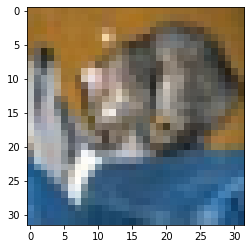

In [45]:
plt.imshow(test_images[0])

In [43]:
test_labels[0]

array([3.], dtype=float32)

In [46]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 1s 11ms/step - loss: 0.7197 - accuracy: 0.7978


[0.7196638584136963, 0.7978000044822693]

#### 가중치 초기값 변경

In [47]:
tf.keras.backend.clear_session()

input_tensor = Input(shape=(32, 32, 3))
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu", kernel_initializer="he_normal")(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu", kernel_initializer="he_normal")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation="relu", kernel_initializer="he_normal")(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation="relu", kernel_initializer="he_normal")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
                 
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", activation="relu", kernel_initializer="he_normal")(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", activation="relu", kernel_initializer="he_normal")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)                 
                 
x = Flatten()(x)
x = Dropout(rate=0.5)(x)                 
x = Dense(200, activation="relu")(x)
x = Dropout(rate=0.3)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(rate=0.2)(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

In [48]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 11s 32ms/step - loss: 1.8403 - accuracy: 0.3065 - val_loss: 1.4132 - val_accuracy: 0.4829
Epoch 2/30
313/313 [==============================] - 9s 30ms/step - loss: 1.4063 - accuracy: 0.4919 - val_loss: 1.2038 - val_accuracy: 0.5701
Epoch 3/30
313/313 [==============================] - 9s 30ms/step - loss: 1.1785 - accuracy: 0.5845 - val_loss: 1.0589 - val_accuracy: 0.6268
Epoch 4/30
313/313 [==============================] - 9s 30ms/step - loss: 1.0295 - accuracy: 0.6410 - val_loss: 0.9414 - val_accuracy: 0.6683
Epoch 5/30
313/313 [==============================] - 9s 30ms/step - loss: 0.9117 - accuracy: 0.6829 - val_loss: 0.8448 - val_accuracy: 0.7107
Epoch 6/30
313/313 [==============================] - 9s 30ms/step - loss: 0.8433 - accuracy: 0.7109 - val_loss: 0.8792 - val_accuracy: 0.6973
Epoch 7/30
313/313 [==============================] - 10s 31ms/step - loss: 0.7670 - accuracy: 0.7380 - val_loss: 0.7493 - val_accuracy: 0.74

In [50]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 1s 11ms/step - loss: 0.8091 - accuracy: 0.7825


[0.8090916872024536, 0.7825000286102295]

#### 배치 정규화

In [52]:
from tensorflow.keras.layers import BatchNormalization, Activation

In [53]:
tf.keras.backend.clear_session()

input_tensor = Input(shape=(32, 32, 3))
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_tensor)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
                 
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)                 
                 
x = Flatten()(x)
x = Dropout(rate=0.5)(x)                 
x = Dense(300, activation="relu")(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0     

In [54]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 14s 39ms/step - loss: 1.6105 - accuracy: 0.4159 - val_loss: 2.9750 - val_accuracy: 0.1465
Epoch 2/30
313/313 [==============================] - 12s 37ms/step - loss: 1.1642 - accuracy: 0.5789 - val_loss: 1.0970 - val_accuracy: 0.5765
Epoch 3/30
313/313 [==============================] - 12s 37ms/step - loss: 0.9592 - accuracy: 0.6574 - val_loss: 1.2005 - val_accuracy: 0.5742
Epoch 4/30
313/313 [==============================] - 12s 37ms/step - loss: 0.8449 - accuracy: 0.7022 - val_loss: 1.0042 - val_accuracy: 0.6422
Epoch 5/30
313/313 [==============================] - 12s 37ms/step - loss: 0.7575 - accuracy: 0.7351 - val_loss: 1.0693 - val_accuracy: 0.6431
Epoch 6/30
313/313 [==============================] - 12s 37ms/step - loss: 0.6895 - accuracy: 0.7605 - val_loss: 0.8978 - val_accuracy: 0.6875
Epoch 7/30
313/313 [==============================] - 12s 38ms/step - loss: 0.6378 - accuracy: 0.7757 - val_loss: 1.2824 - val_accuracy:

In [56]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 1s 14ms/step - loss: 0.7914 - accuracy: 0.7936


[0.7913919687271118, 0.7936000227928162]

#### Batch 사이즈 조정

In [61]:
def build_model():
  tf.keras.backend.clear_session()

  input_tensor = Input(shape=(32, 32, 3))
  x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_tensor)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)

  x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
                  
  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)                 
                  
  x = Flatten()(x)
  x = Dropout(rate=0.5)(x)                 
  x = Dense(300, activation="relu")(x)
  x = Dropout(rate=0.3)(x)
  x = Dense(100, activation="relu")(x)
  x = Dropout(rate=0.3)(x)
  output = Dense(10, activation="softmax")(x)

  model = Model(inputs=input_tensor, outputs=output)
  return model


In [ ]:
batch_sizes = [32, 64, 256]
for batch_size in batch_sizes:
  model = build_model()
  model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x=train_images, y=train_oh_labels, batch_size=batch_size, epochs=30, validation_split=0.2)
  evaluate_accuracy = model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)
  print("Result : ", batch_size, evaluate_accuracy)

Epoch 1/30
1250/1250 [==============================] - 30s 23ms/step - loss: 1.6864 - accuracy: 0.3785 - val_loss: 1.5436 - val_accuracy: 0.4659
Epoch 2/30
1250/1250 [==============================] - 27s 22ms/step - loss: 1.2102 - accuracy: 0.5764 - val_loss: 1.1430 - val_accuracy: 0.6124
Epoch 3/30
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9976 - accuracy: 0.6607 - val_loss: 0.9220 - val_accuracy: 0.6806
Epoch 4/30
1250/1250 [==============================] - 28s 22ms/step - loss: 0.8792 - accuracy: 0.7012 - val_loss: 1.2399 - val_accuracy: 0.5738
Epoch 5/30
1250/1250 [==============================] - 27s 22ms/step - loss: 0.7927 - accuracy: 0.7325 - val_loss: 1.6327 - val_accuracy: 0.5535
Epoch 6/30
1250/1250 [==============================] - 27s 21ms/step - loss: 0.7212 - accuracy: 0.7582 - val_loss: 0.7357 - val_accuracy: 0.7530
Epoch 7/30
1250/1250 [==============================] - 27s 22ms/step - loss: 0.6593 - accuracy: 0.7785 - val_loss: 0.7298 -